# Introduction to Descriptive and Predictive Models

This module introduces the core ideas of *machine learning*, which is subdivided into **unsupervised** and **supervised** machine learning.

We break it into three segments:

1. Representing data for building machine learning models.
2. Unsupervised machine learning.
3. Supervised machine learning.


## 1. Representing Data for Building Machine Learning Models

To this point, we've used **dataframes** to capture data.  Dataframes allow for many rows, each containing named fields with heterogeneous types (string, Python object, image, etc.).  Of course, we assume that each field generally has a value (recall how we did *data cleaning* for cases where values were missing).

For machine learning, we'll typically want to use **arrays** (matrices) to represent data.  Recall that arrays have **homogeneous** types, i.e., all values are of the same type.  Typically we will use either integer or floating-point values for the array.

We expect you to be generally familiar with Numpy arrays, but we will provide a brief refresher of a few key points...

Given data in a dataframe, we will typically convert it into a matrix as follows:

1. We will convert each dataframe row (*instance*) to a matrix row.
1. We will drop columns that contain data we don't expect to be useful as **features** (i.e., that isn't predictive for the machine learning output).
1. We will convert the remaining columns to one or more columns in the matrix.

Often, step #3 involves **feature extraction** (perhaps extracting a particular piece of data out of a dataframe field), normalization, or encoding.

## 1.1 Quick Review of Numpy Arrays

In [0]:
# Basics of arrays: Numpy

import numpy as np

# We start with a simple array, initialized with random values

arr = np.ndarray((4,2))

# Show dimensions
arr.shape


(4, 2)

In [0]:
arr

array([[2.29925345e-316, 1.58101007e-322],
       [1.99780641e-306, 7.86351806e-067],
       [1.34994980e+161, 2.88034532e+180],
       [3.34721543e-033, 7.31966791e-110]])

In [0]:
# We can also initialize with zeros or ones...
arr2 = np.zeros((4,2))

arr2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

## 1.2 Encoding Categorical Data

While arrays are integer-valued, sometimes we need to start with DataFrame data, which may be categorical.  How do we go from that to numbers?

In [0]:
import pandas as pd

addresses_df = pd.DataFrame([{'city': 'New York', 'state': 'NY'},\
                             {'city': 'Los Angeles', 'state': 'CA'},\
                             {'city': 'Chicago', 'state': 'IL'},\
                             {'city': 'Houston', 'state': 'TX'},\
                             {'city': 'Phoenix', 'state': 'AZ'}, \
                             {'city': 'Philadelphia', 'state': 'PA'}, \
                             {'city': 'San Antonio', 'state': 'TX'}])

addresses_df

,city,state
0,New York,NY
1,Los Angeles,CA
2,Chicago,IL
3,Houston,TX
4,Phoenix,AZ
5,Philadelphia,PA
6,San Antonio,TX


Suppose we want to turn this into machine learning features!  Let's focus on  `state`.  This is categorical and string-valued, so we may need to *one-hot encode* it.  Each unique string will receive its own column, and the column will be set to `0` if the value isn't present, or `1` if it is.  Only one column will be set for each row, hence "one-hot".

Pandas' `get_dummies` function will take a DataFrame or Series, and produce a one-hot-encoded DataFrame useful for machine learning.

In [0]:
pd.get_dummies(addresses_df['state'])

,AZ,CA,IL,NY,PA,TX
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1


In [0]:
# And if we really want an array...
pd.get_dummies(addresses_df['state']).to_numpy()

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [0]:
# A more realistic use case of slicing...  We often start with training
# data that has *labels*, i.e., in- or out-of-class

# Suppose we wanted addresses in states that have the letter 'A' in them...
addresses_df['has_a'] = addresses_df['state'].apply(lambda x: 'A' in x)
addresses_df

data = pd.get_dummies(addresses_df['state'])
data['class'] = addresses_df['has_a']

# This is what the training set might look like
data = data.to_numpy()
data

array([[0, 0, 0, 1, 0, 0, False],
       [0, 1, 0, 0, 0, 0, True],
       [0, 0, 1, 0, 0, 0, False],
       [0, 0, 0, 0, 0, 1, False],
       [1, 0, 0, 0, 0, 0, True],
       [0, 0, 0, 0, 1, 0, True],
       [0, 0, 0, 0, 0, 1, False]], dtype=object)

In [0]:
# All rows, last column
y = data[:,-1]
# All rows, all but last column
X = data[:,0:-1]

print('Labels:')
print(y)

print('Training data:')
print(X)

Labels:
[False True False False True True False]
Training data:
[[0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


## 1.3 Slicing Parts of an Array

In [0]:
# Slicing gives a subset of an array

# In each dimension you can give a left:right
# range. Ranges are left-inclusive and right exclusive
arr[1:3,1]

array([7.86351806e-067, 2.88034532e+180])

In [0]:
# Negative numbers cut from the end
arr[-2,1:3]

array([2.88034532e+180])

# 2. Unsupervised Machine Learning

## 2.1 Dimensionality Reduction

### Example Data

We'll start by using PCA, which is helpful in reducing dimensionality.  Here we use a dataset on types of glass -- useful in criminology where we may need to identify a glass shard by its purpose.  This dataset comes from the UC Irvine Machine Learning Repository; it was created by B. German in Britain's Home Office Forensic Science Service and donated by Dr. Vina Spiehler of Diagnostic Products Corporation.  You can read more about it at:

https://archive.ics.uci.edu/ml/datasets/glass+identification



We will start by downloading the data from where it is shared in Google Drive.

In [1]:
!pip install googledrivedownloader

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Glass data from https://archive.ics.uci.edu/ml/machine-learning-databases/glass/
gdd.download_file_from_google_drive(file_id='1b1C1AlZmqada3ncYWVqJd8zQIWphOo_K',
                                    dest_path='/content/glass.csv')

In [3]:
!head glass.csv

ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1
7,1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0,1


In [4]:
# Load into a dataframe, with the header in row 0
import pandas as pd

glass_df = pd.read_csv('glass.csv', header=[0])

glass_df

,ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


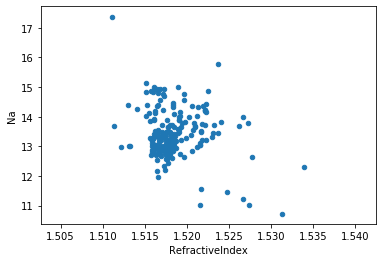

In [5]:
import matplotlib
import matplotlib.pyplot as plt

fig1 = glass_df.plot.scatter(x='RefractiveIndex',y='Na')

In [6]:
# Remove the ID and the Type labels for the training data
X = glass_df.drop(['ID','Type'], axis=1)

# Labels
y = glass_df['Type']

# Let's see the data
X

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### 2.1.1 Principal Components Analysis (PCA)

We will now use **PCA** to reduce the number of dimensions in the data.

Best practice for PCA is to scale the data...

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features between 0 and 1
X = StandardScaler().fit_transform(X)

X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

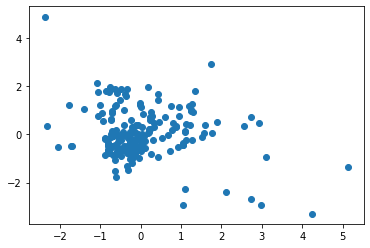

In [8]:
# Re-plotting now with the mean at the center!
plt.scatter(X[:,0], X[:,1])

### Running PCA

We start by creating an instance of the PCA class, and fit it to the data...

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X2 = pca.fit_transform(X)

In [10]:
# Let's see the components
pca.components_

array([[ 0.54517662, -0.2581256 ,  0.11088095, -0.42870863, -0.22883635,
        -0.21934405,  0.49230609, -0.25037512,  0.18584154],
       [ 0.28568318,  0.27035007, -0.59355826,  0.29521154, -0.15509891,
        -0.15397013,  0.3453798 ,  0.48470218, -0.06203879],
       [ 0.08691083, -0.38491962,  0.00841796,  0.32923712, -0.45870884,
         0.66257412, -0.00098473,  0.07405473,  0.28445055],
       [ 0.14738099,  0.49124204,  0.37878577, -0.13750592, -0.65253771,
        -0.03853544, -0.27644322,  0.13317545, -0.23049202],
       [-0.0735427 ,  0.1536833 ,  0.12350912,  0.01410888,  0.00850012,
        -0.30703984, -0.18818774,  0.25133426,  0.87326405],
       [ 0.11528772, -0.55811757,  0.30818598, -0.01885731,  0.08609797,
        -0.24363237, -0.14866937,  0.65721884, -0.24304431],
       [ 0.08186724,  0.14858006, -0.20604537, -0.69923557,  0.21606658,
         0.50412141, -0.09913463,  0.35178255,  0.07372136],
       [-0.7522159 , -0.12769315, -0.07689061, -0.27444105, -0

In [11]:
X[:,0:2]

array([[ 8.72867646e-01,  2.84953261e-01],
       [-2.49333469e-01,  5.91817180e-01],
       [-7.21318056e-01,  1.49933137e-01],
       [-2.32830512e-01, -2.42852679e-01],
       [-3.12044708e-01, -1.69205338e-01],
       [-7.93931069e-01, -7.58384063e-01],
       [-3.08744117e-01, -1.32381668e-01],
       [-2.65836427e-01, -3.16500020e-01],
       [ 2.68859399e-01,  7.75935532e-01],
       [-2.69137018e-01, -5.00618371e-01],
       [-8.76445857e-01, -8.44305960e-01],
       [-2.42732286e-01, -7.46109506e-01],
       [-8.17035210e-01, -6.47913052e-01],
       [-2.92241159e-01, -6.72462165e-01],
       [-2.42732286e-01, -9.79326084e-01],
       [-2.49333469e-01, -7.33834949e-01],
       [-1.73419864e-01, -8.93404187e-01],
       [ 1.18642384e+00,  1.16872135e+00],
       [ 2.45755258e-01,  6.04091737e-01],
       [-3.35148849e-01, -4.76069257e-01],
       [-2.85639976e-01, -7.21560392e-01],
       [ 4.27287791e-01,  1.67197817e+00],
       [-3.31848257e-01, -7.70658619e-01],
       [-2.

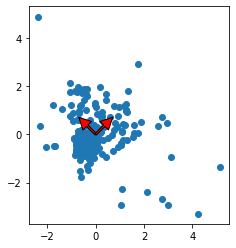

In [12]:
# Visualization code based on 
# https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib
import numpy as np

# Let's take our first two dimensions, as before
data = X[:, 0:2]

mu = data.mean(axis=0)
data = (data - mu)/data.std(axis=0)
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

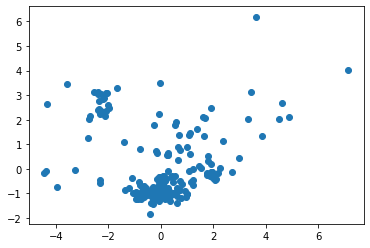

In [13]:
# Here is the transformed data along the first 2 components
plt.scatter(X2[:,0], X2[:,1])

### 2.1.2 How Many Components? Principal Components vs Explained Variance

How much does each component explain the variance?  We can look at the `explained_variance_ratio_` to tell...

In [14]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378, 0.12865138, 0.10155581,
       0.05862613, 0.04099538, 0.00709477, 0.00017876])

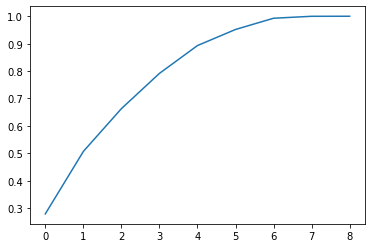

In [15]:
# See how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

... So, the first 6 components (of 9) gives 95% explained variance.  Not too bad!

### 2.1.3 Learning over PCA-Reduced Data

From the above, we saw how to do PCA on the overall dataset.  But let's do it more methodically as part of machine learning.  We'll start with separate training and test data.



In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)

# Fit the PCA on the training data
pca = PCA(n_components=6)
pca.fit(X_train)
# and transform it
X_train_2 = pca.transform(X_train)

# Then train a simple linear regression classifier
# (tries to find the best weighted linear combination to
# match the output)
regr = linear_model.LinearRegression()
regr.fit(X_train_2, y_train)

X_train_2

array([[-1.40712977, -0.5548499 ,  0.27978336, -0.19045658,  0.68459377,
         0.02754543],
       [ 0.97583006, -0.86557172,  0.42879509,  0.49226798, -1.77175323,
         0.24376956],
       [ 0.68750686,  0.14086061, -1.70529824, -3.08716943, -0.74135314,
        -0.04003752],
       ...,
       [-0.67637945, -0.83390501,  0.76929081, -0.46784216, -1.45750402,
        -0.02251824],
       [-0.03405592,  0.56315378, -1.04661605, -0.28054165, -0.20925479,
        -0.71265347],
       [ 0.49573744, -1.2931273 ,  0.7719564 , -1.45704714, -1.22898275,
         0.61543649]])

In [17]:
X_test_2 = pca.transform(X_test)

regr.predict(X_test_2)

regr.score(X_test_2, y_test)

0.8739872270917841

So, 87.4% predictive accuracy on the test set.

How does that compare with working directly on the real data?

In [18]:
# Train and evaluate over non-dimensionality-reduced data
regr_full_data = linear_model.LinearRegression()
regr_full_data.fit(X_train, y_train)

regr_full_data.predict(X_test)
regr_full_data.score(X_test, y_test)

0.8557278202617988

### 2.1.4 t-SNE

For high-dimensional data, we often use t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce dimensionality.  This is a stochastic method so it doesn't always produce the same output.

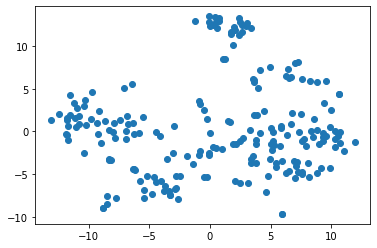

In [19]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1])

## 2.2 Clustering

### 2.2.1 k-Means Clustering

In [20]:
# Let's take the data from X_embedded and try to choose a clustering!
X_embedded

array([[ -2.490382  ,  -5.2438116 ],
       [  3.3269467 ,   0.19986811],
       [  5.9362288 ,  -3.482207  ],
       [  3.7600892 ,  -0.9942391 ],
       [  5.832169  ,   0.3819711 ],
       [-11.523452  ,   1.9594401 ],
       [  5.859539  ,   0.62240636],
       [  6.7094965 ,   0.8877372 ],
       [ -0.8180377 ,  -2.289632  ],
       [ -7.372281  ,   1.292786  ],
       [-11.808565  ,   1.5225136 ],
       [  9.309089  ,  -0.6412279 ],
       [-11.795939  ,   1.2845724 ],
       [ -9.336398  ,   0.9766059 ],
       [ 10.707975  ,  -1.3182063 ],
       [ 10.296583  ,  -0.832484  ],
       [ 10.308717  ,   0.07257399],
       [ -2.836298  ,  -6.584871  ],
       [ -1.4090956 ,  -3.8511183 ],
       [  3.1079657 ,  -6.0358844 ],
       [ -9.824226  ,   1.4852283 ],
       [ -2.5933259 ,  -7.9599633 ],
       [  8.509955  ,  -0.7091381 ],
       [  9.344872  ,  -1.099199  ],
       [  5.2230945 ,  -0.08838023],
       [  8.340836  ,   0.03492003],
       [  3.7787862 ,  -1.4298228 ],
 

### The Algorithm, in Full Detail

Let's start with the basic algorithm.  We'll split it into three components:
1. The clustering coefficient or `error` function -- how far away are points?
2. The function to get the most appropriate cluster for a point, `get_nearest`.
3. The main K-Means algorithm.

For this version we will initialize with randomly chosen points in the dataset, then iteratively recompute until we reach convergence (which is detected when every point remains in its current cluster).

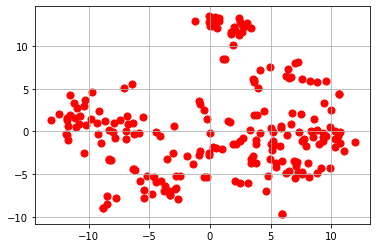

Initialized centroids to: 
[[ 5.1867404  -1.12056947]
 [-6.41306686  5.53532696]]
Iteration 1
Cluster 0
[ 4.39592743 -1.41164005]
Cluster 1
[-5.47231346  3.34697741]
Iteration 2
Cluster 0
[ 4.98263957 -1.13154399]
Cluster 1
[-5.38145707  2.58441974]
Iteration 3
Cluster 0
[ 5.76674155 -0.69037467]
Cluster 1
[-5.10966681  1.73715254]
Iteration 4
Cluster 0
[ 6.04406969 -0.31818851]
Cluster 1
[-5.07973622  1.30442739]
Iteration 5
Cluster 0
[6.02659173 0.4714514 ]
Cluster 1
[-5.37941604  0.53106646]
Iteration 6
Cluster 0
[5.64309256 1.66021344]
Cluster 1
[-6.09966463 -0.95173902]
Iteration 7
Cluster 0
[5.1392564  2.07937012]
Cluster 1
[-6.85766166 -1.94247546]
Iteration 8
Converged!


array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
from random import randint

def error(x,c):
  """
  Error (distance, clustering coefficient) between a point x
  and the centroid c.  We are using Euclidean distance, which
  can also be thought of as the sum of the squared error.
  """
  #err = 0
  #for i in range(len(x)):
  #  err = err + np.square(x[i] - c[i])

  err = np.linalg.norm(x - c)

  return err

def get_nearest(c_list, x):
  nearest = -1
  nearest_error = np.infty
  for i, v in enumerate(c_list):
    if error(x, v) < nearest_error:
      nearest_error = error(x, v)
      nearest = i
  return nearest

def kmeans(X, k, show):
  """
  Simple k-means algorithm
  """
  # Initialize the centroids to random points
  # in the data
  centroids = np.zeros((k,2))
  cluster_assignments = [0 for i in range(len(X))]
  for i in range(0, k):
    centroids[i] = X[randint(0, X.shape[0])]

  if show:
    print('Initialized centroids to: ')
    print(centroids)

  iteration = 1
  changed = True
  while changed:
    if show:
      print ('Iteration %d'%iteration)
      iteration = iteration + 1

    # Nothing happened in this iteration, by default    
    changed = False
    # Assign points to clusters
    for i,x in enumerate(X):
      nearest = get_nearest(centroids, x)
      # We changed a cluster mapping!
      if nearest != cluster_assignments[i]:
        changed = True
      cluster_assignments[i] = nearest

    if changed:
      # Recompute clusters
      for i in range(len(centroids)):
        points = [j for j,v in enumerate(cluster_assignments) if v == i]
        if show:
          print ('Cluster %d'%i)
        X_subset = np.array([[X[i,0],X[i,1]] for i in points])
        #if show:
        #  print (X_subset)

        if len(X_subset):
          centroids[i][0] = np.sum(X_subset[:, 0]) / len(points)
          centroids[i][1] = np.sum(X_subset[:, 1]) / len(points)
          print (centroids[i])
    elif show:
      print('Converged!')

  return (centroids, np.array(cluster_assignments))

  
k = 2
plt.scatter(X_embedded[:,0], X_embedded[:,1], c='red', marker='o', s=50)
plt.grid()
plt.show()
centroids, assignments = kmeans(X_embedded, k, True)

assignments

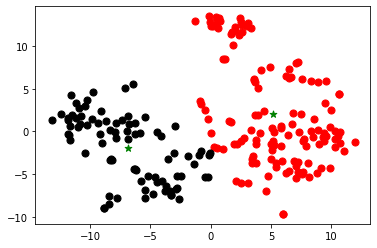

In [22]:
# Plotting along with the Centroids
clust0 = np.array([x for i, x in enumerate(X_embedded) if assignments[i] == 0])
clust1 = np.array([x for i, x in enumerate(X_embedded) if assignments[i] == 1])

plt.scatter(clust0[:,0], clust0[:,1], c='red', marker='o', s=50)
plt.scatter(clust1[:,0], clust1[:,1], c='black', marker='o', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, c='g')

In [23]:
from sklearn.cluster import KMeans

km = KMeans(2, 'random', n_init=1, max_iter=300, random_state=0)
km.fit(X_embedded)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [24]:
km.cluster_centers_

array([[-6.8576612, -1.9424751],
       [ 5.139255 ,  2.0793698]], dtype=float32)

In [25]:
km.labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

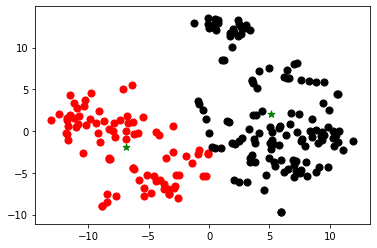

In [26]:
# Plotting along with the Centroids
clust0 = np.array([x for i, x in enumerate(X_embedded) if km.labels_[i] == 0])
clust1 = np.array([x for i, x in enumerate(X_embedded) if km.labels_[i] == 1])

plt.scatter(clust0[:,0], clust0[:,1], c='red', marker='o', s=50)
plt.scatter(clust1[:,0], clust1[:,1], c='black', marker='o', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, c='g')

## 2.2.2 Choosing the Right *k* for Clustering

To pick the right value of *k* for our data, we will search the space of possible values -- looking at the smallest one that (roughly) minimizes the total error (Euclidean distance), aka the distortion.

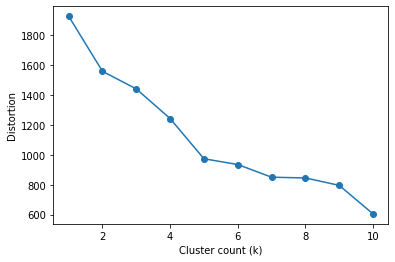

In [27]:
distortions = []

max_k = 10
for i in range(1,max_k+1):
  km = KMeans(n_clusters=i,
              init='random',
              n_init=1,
              max_iter=300,
              random_state=0)
  km.fit(X)
  # The distortion is called inertia in SciKit
  distortions.append(km.inertia_)

plt.plot(range(1,max_k+1), distortions, marker='o')
plt.xlabel('Cluster count (k)')
plt.ylabel('Distortion')
plt.show()